In [1]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


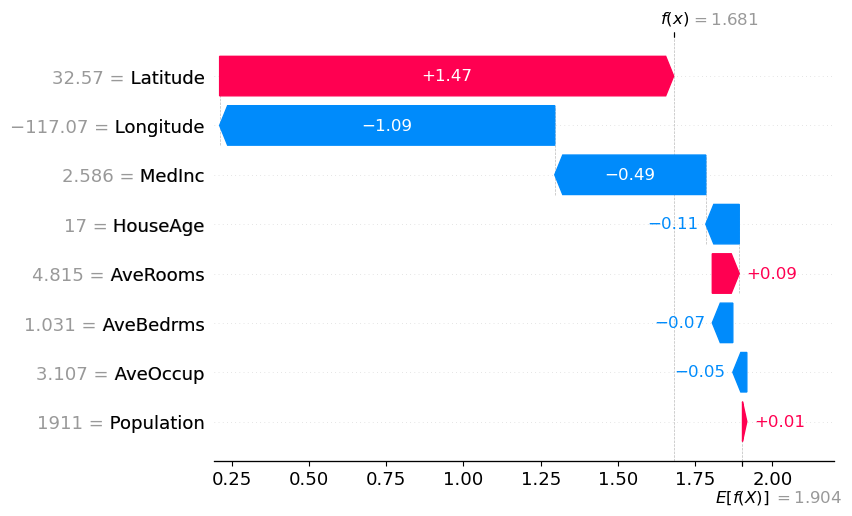

In [2]:

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)
sample_ind = 20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)


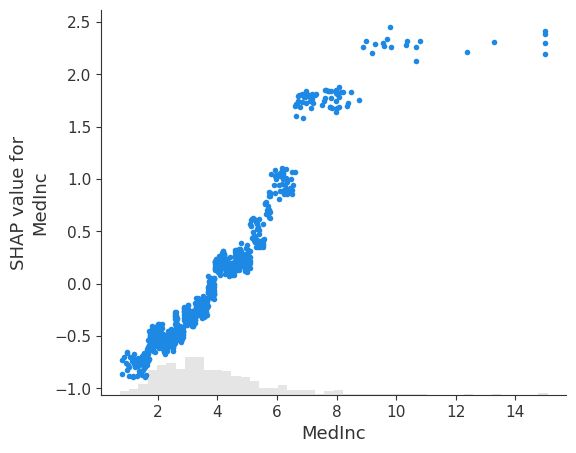

In [3]:

# train XGBoost model
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

shap.plots.scatter(shap_values_xgb[:, "MedInc"])

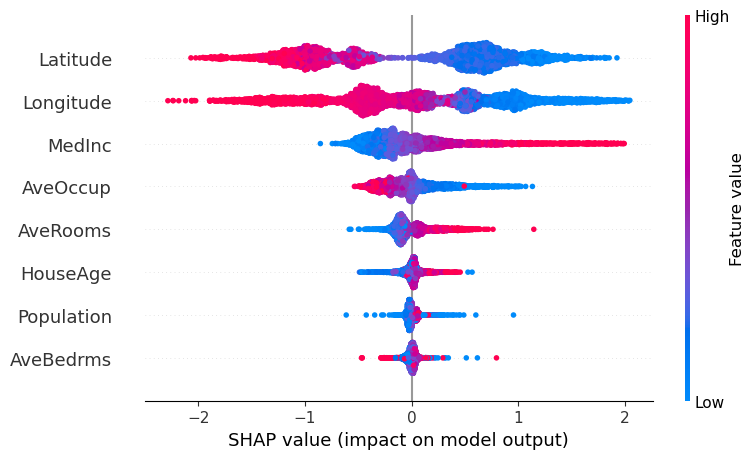

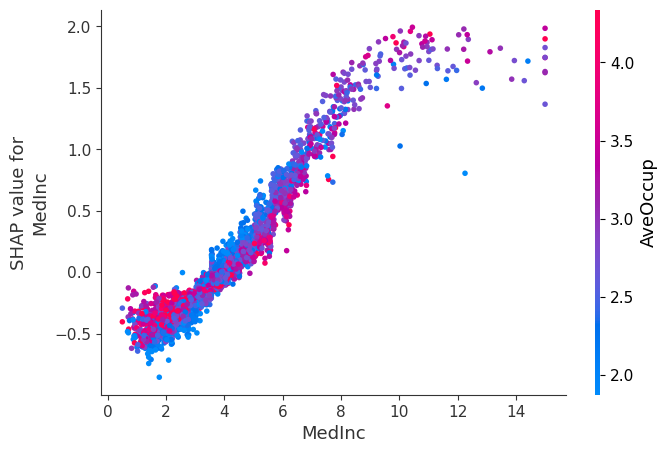

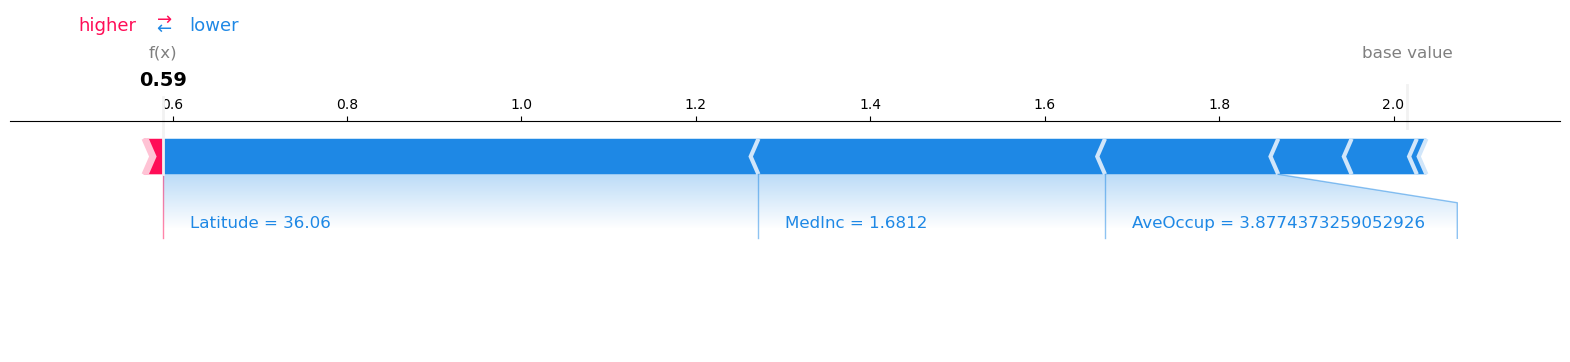

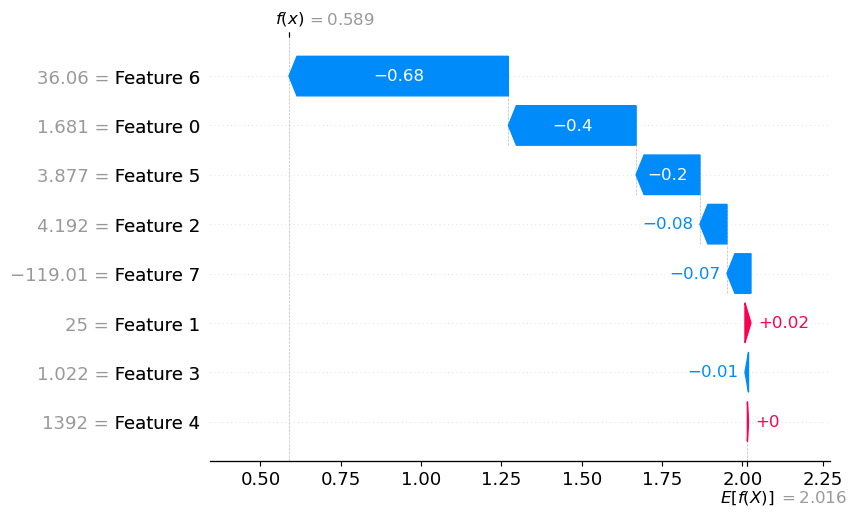

In [4]:
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# 1. Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train an XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4)
xgboost_model.fit(X_train, y_train)

# 3. Explain the model's predictions using SHAP
explainer = shap.Explainer(xgboost_model, X_train)
shap_values = explainer(X_test)

# 4. SHAP Summary Plot (global feature importance)
plt.figure()  # Create a new figure
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
plt.show()  # Display the plot

# 5. SHAP Dependence Plot (feature vs. SHAP value)
shap.dependence_plot('MedInc', shap_values.values, X_test, feature_names=feature_names)
plt.show()  # Display the plot

# 6. SHAP Force Plot (local explanation of a single prediction)
  # Create a new figure
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0], feature_names=feature_names, matplotlib=True)
plt.show()  # Display the plot

# 7. SHAP Waterfall Plot (breakdown of individual prediction)
plt.figure()  # Create a new figure
shap.plots.waterfall(shap_values[0])
plt.show()  # Display the plot
